# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

mpl.font_manager.fontManager.addfont('K2D-Light.ttf')
mpl.rc('font', family = 'K2D', size = 11, weight = 200)

In [2]:
# Zodiac mapping function
zodiac_index = {'Capricon':1, 'Aquarius':2, 'Pisces':3, 'Aries':4, 'Taurus':5, 'Gemini':6,
               'Cancer':7, 'Leo':8, 'Virgo':9, 'Libra':10, 'Scorpio':11, 'Sagittarius':12}

def zodiac(df):
    if (df['D'] >= 15 and df['M'] == 1) or (df['D'] < 13 and df['M'] == 2):
        return 'Capricon'        
    elif (df['D'] >= 13 and df['M'] == 2) or (df['D'] < 15 and df['M'] == 3):
        return 'Aquarius'
    elif (df['D'] >= 15 and df['M'] == 3) or (df['D'] < 13 and df['M'] == 4):
        return 'Pisces'
    elif (df['D'] >= 13 and df['M'] == 4) or (df['D'] < 15 and df['M'] == 5):
        return 'Aries'
    elif (df['D'] >= 15 and df['M'] == 5) or (df['D'] < 15 and df['M'] == 6):
        return 'Taurus'
    elif (df['D'] >= 15 and df['M'] == 6) or (df['D'] < 15 and df['M'] == 7):
        return 'Gemini'
    elif (df['D'] >= 15 and df['M'] == 7) or (df['D'] < 16 and df['M'] == 8):
        return 'Cancer'
    elif (df['D'] >= 16 and df['M'] == 8) or (df['D'] < 17 and df['M'] == 9):
        return 'Leo'
    elif (df['D'] >= 17 and df['M'] == 9) or (df['D'] < 17 and df['M'] == 10):
        return 'Virgo'
    elif (df['D'] >= 17 and df['M'] == 10) or (df['D'] < 16 and df['M'] == 11):
        return 'Libra'
    elif (df['D'] >= 16 and df['M'] == 11) or (df['D'] < 16 and df['M'] == 12):
        return 'Scorpio'
    elif (df['D'] >= 16 and df['M'] == 12) or (df['D'] < 15 and df['M'] == 1):
        return 'Sagittarius'

In [4]:
# Import data
df = pd.read_excel('Customer Behaviors (Responses).xlsx')
df = df[df.columns[1:]]

# Rename columns
intr_col = [c.replace('คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด', 'Interest') for c in df.columns if 'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด' in c]
cons_col = [c.replace('คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน', 'Consumption') for c in df.columns if 'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน' in c]
df.columns = intr_col + cons_col + ['Others', 'Date of Birth', 'Gender']

# Prepare data
df[intr_col] = df[intr_col].replace({'ไม่สนใจอย่างมากที่สุด':1, 'ไม่สนใจอย่างมาก':2, 'ไม่สนใจ':3, 'เฉยๆ':4, 'สนใจ':5, 'สนใจอย่างมาก':6, 'สนใจอย่างมากที่สุด':7})
df[cons_col] = df[cons_col].replace({'แทบไม่ได้บริโภคเลย':1, 'หลายเดือนครั้ง':2, 'เดือนละ 2-3 ครั้ง':3, 'เดือนละครั้ง':4, 'อาทิตย์ละครั้ง':5, 'แทบทุกวัน':6})
df['Gender'] = df['Gender'].map({'ชาย':'M', 'หญิง':'F', 'ไม่ต้องการระบุ':np.nan})

df['Y'] = df['Date of Birth'].apply(lambda x: int(str(x).split()[0].split('-')[0])).apply(lambda x: x if x < 2500 else x - 543)
df['M'] = df['Date of Birth'].apply(lambda x: int(str(x).split()[0].split('-')[1]))
df['D'] = df['Date of Birth'].apply(lambda x: int(str(x).split()[0].split('-')[2]))

df['Date of Birth'] = pd.to_datetime(df['Y'].astype(str) + '-'+ df['M'].astype(str) + '-' + df['D'].astype(str))
df['Age'] = df['Date of Birth'].dt.year.apply(lambda x: 2021 - x if x < 2020 else np.nan)

df['Zodiac'] = df.apply(zodiac, axis = 1)

df.drop(['Y', 'M', 'D'], axis = 1, inplace = True)
df.dropna(inplace = True)

# Unpivoted data
survey_index = dict(zip(intr_col + cons_col, range(len(intr_col + cons_col))))

df_unpivoted = df[intr_col + cons_col + ['Gender', 'Age', 'Zodiac']].melt(id_vars = ['Gender', 'Age', 'Zodiac'], var_name = 'Survey', value_name = 'Score')
df_unpivoted['Survey Index'] = df_unpivoted['Survey'].map(survey_index)
df_unpivoted['Zodiac Index'] = df_unpivoted['Zodiac'].map(zodiac_index)
df_unpivoted.sort_values(['Survey Index', 'Zodiac Index'], ascending = [True, True], inplace = True)
df_unpivoted.drop(['Survey Index', 'Zodiac Index'], axis = 1, inplace = True)

df.head()

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],...,Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],Others,Date of Birth,Gender,Age,Zodiac
0,5,5,7,6,5,5,5,5,7,4,...,3,3,3,3,6,"กีฬา UFC, Soccer",1988-09-19,M,33.0,Virgo
1,6,4,7,6,5,6,7,6,3,4,...,6,5,2,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,28.0,Cancer
2,7,4,6,5,4,7,7,7,2,4,...,3,3,3,2,6,-,1993-11-07,M,28.0,Libra
3,5,4,4,4,5,5,5,5,1,1,...,4,1,1,1,3,"โหราศาสตร์,ดูดวง",1994-04-14,M,27.0,Aries
4,6,5,5,5,7,4,4,4,4,4,...,3,4,1,1,3,สัตว์เลี้ยง,1995-04-19,F,26.0,Aries


# Demographic

<ipython-input-5-8bf84794eb7e>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_zodiac = pd.DataFrame([[x, y, df[df['Zodiac'] == x][df['Gender'] == y]['Age'].count()] for _, x in enumerate(df['Zodiac'].unique()) for _, y in enumerate(df[df['Zodiac'] == x]['Gender'].unique())], columns = ['Zodiac','Gender','Count']).sort_values(['Zodiac', 'Gender'])


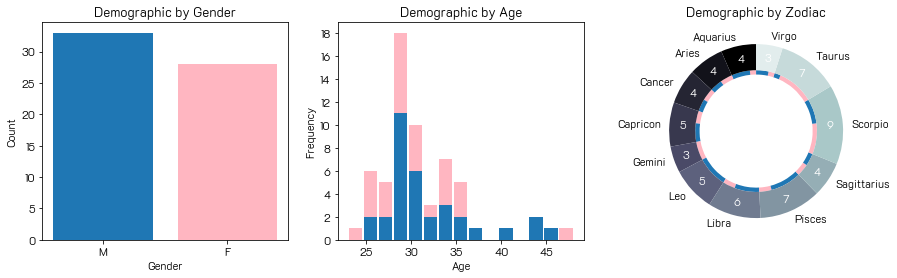

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))

ax1.set_title('Demographic by Gender')
ax1.bar(df['Gender'].unique(), df['Gender'].value_counts(), color = ['tab:blue', 'lightpink'])
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

ax2.set_title('Demographic by Age')
ax2.hist([df[df['Gender'] == 'M']['Age'], df[df['Gender'] == 'F']['Age']], bins = 15, rwidth = 0.9, stacked = True, color = ['tab:blue', 'lightpink'])
ax2.yaxis.set_major_locator(MaxNLocator(integer = True))
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')

ax3.set_title('Demographic by Zodiac')
df_zodiac = pd.DataFrame([[x, y, df[df['Zodiac'] == x][df['Gender'] == y]['Age'].count()] for _, x in enumerate(df['Zodiac'].unique()) for _, y in enumerate(df[df['Zodiac'] == x]['Gender'].unique())], columns = ['Zodiac','Gender','Count']).sort_values(['Zodiac', 'Gender'])
ax3.pie(df_zodiac['Count'], colors = ['lightpink', 'tab:blue'] * 10, radius = 0.7, wedgeprops = dict(width = 0.05), startangle = 90)
ax3.set_prop_cycle('color', [plt.get_cmap('bone')(x / len(df_zodiac['Zodiac'].unique())) for x, _ in enumerate(df_zodiac['Zodiac'].unique())])
_, _, autotexts = ax3.pie(df_zodiac.groupby(['Zodiac']).sum()['Count'], labels = df_zodiac['Zodiac'].unique(), wedgeprops = dict(width = 0.3), startangle = 90, autopct = lambda x: '{:,.0f}'.format(x * df_zodiac['Count'].sum() / 100), pctdistance = 0.85)
[autotext.set_color('white') for autotext in autotexts]

plt.show()

# Box Plot

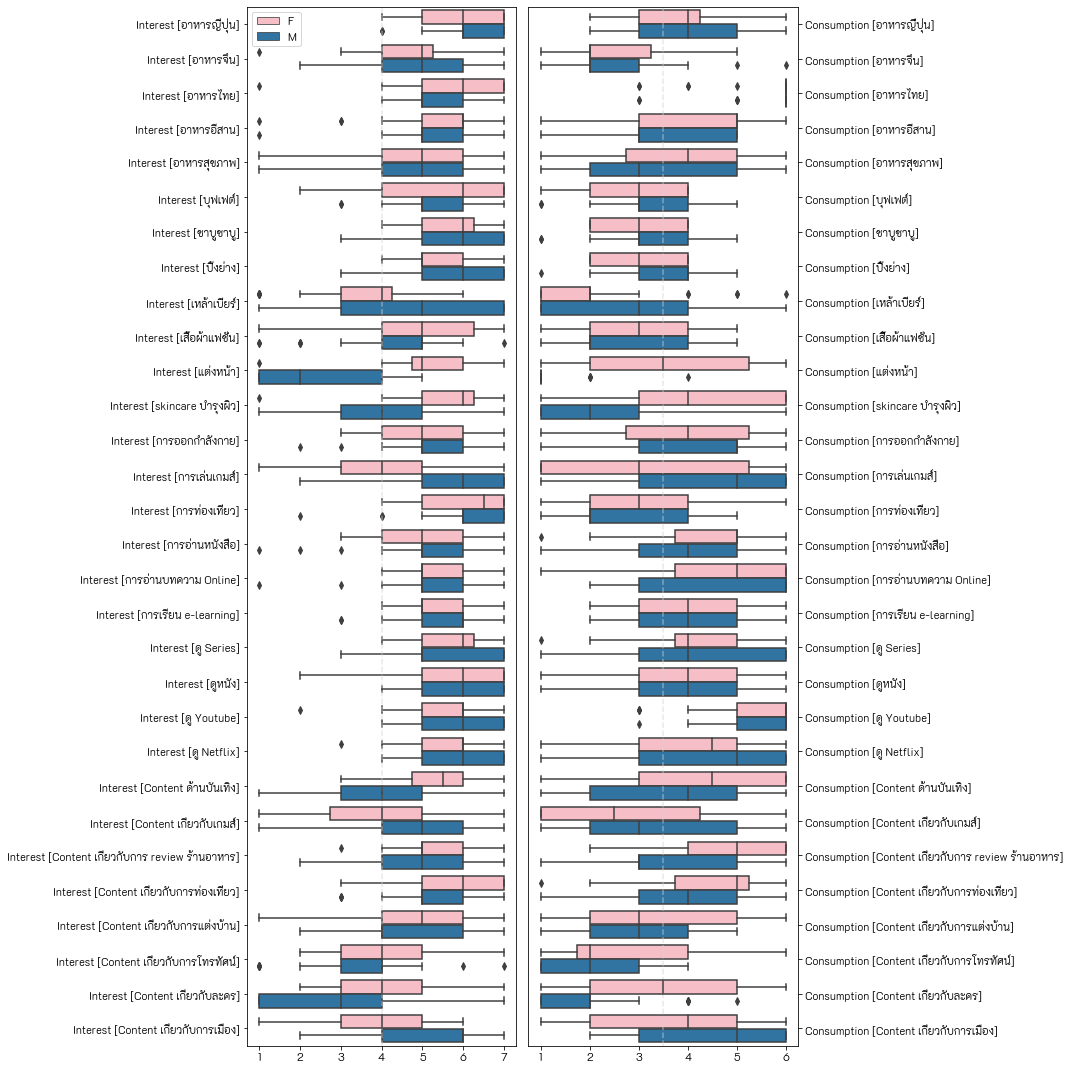

In [8]:
plt.subplots(1, 2, figsize = (15, 15), tight_layout = True)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Score', y = 'Survey', hue = 'Gender', data = df_unpivoted[df_unpivoted['Survey'].isin(intr_col)], palette = {'M':'tab:blue', 'F':'lightpink'})
plt.gca().axes.axvline(x = 4, color = 'lightgray', alpha = 0.5, linestyle = '--')
plt.legend(loc = 'upper left')
plt.gca().axes.set_xlabel('')
plt.gca().axes.set_ylabel('')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'Score', y = 'Survey', hue = 'Gender', data = df_unpivoted[df_unpivoted['Survey'].isin(cons_col)], palette = {'M':'tab:blue', 'F':'lightpink'})
plt.gca().axes.axvline(x = 3.5, color = 'lightgray', alpha = 0.5, linestyle = '--')
plt.gca().axes.get_legend().remove()
plt.gca().axes.yaxis.tick_right()
plt.gca().axes.set_xlabel('')
plt.gca().axes.set_ylabel('')

plt.show()

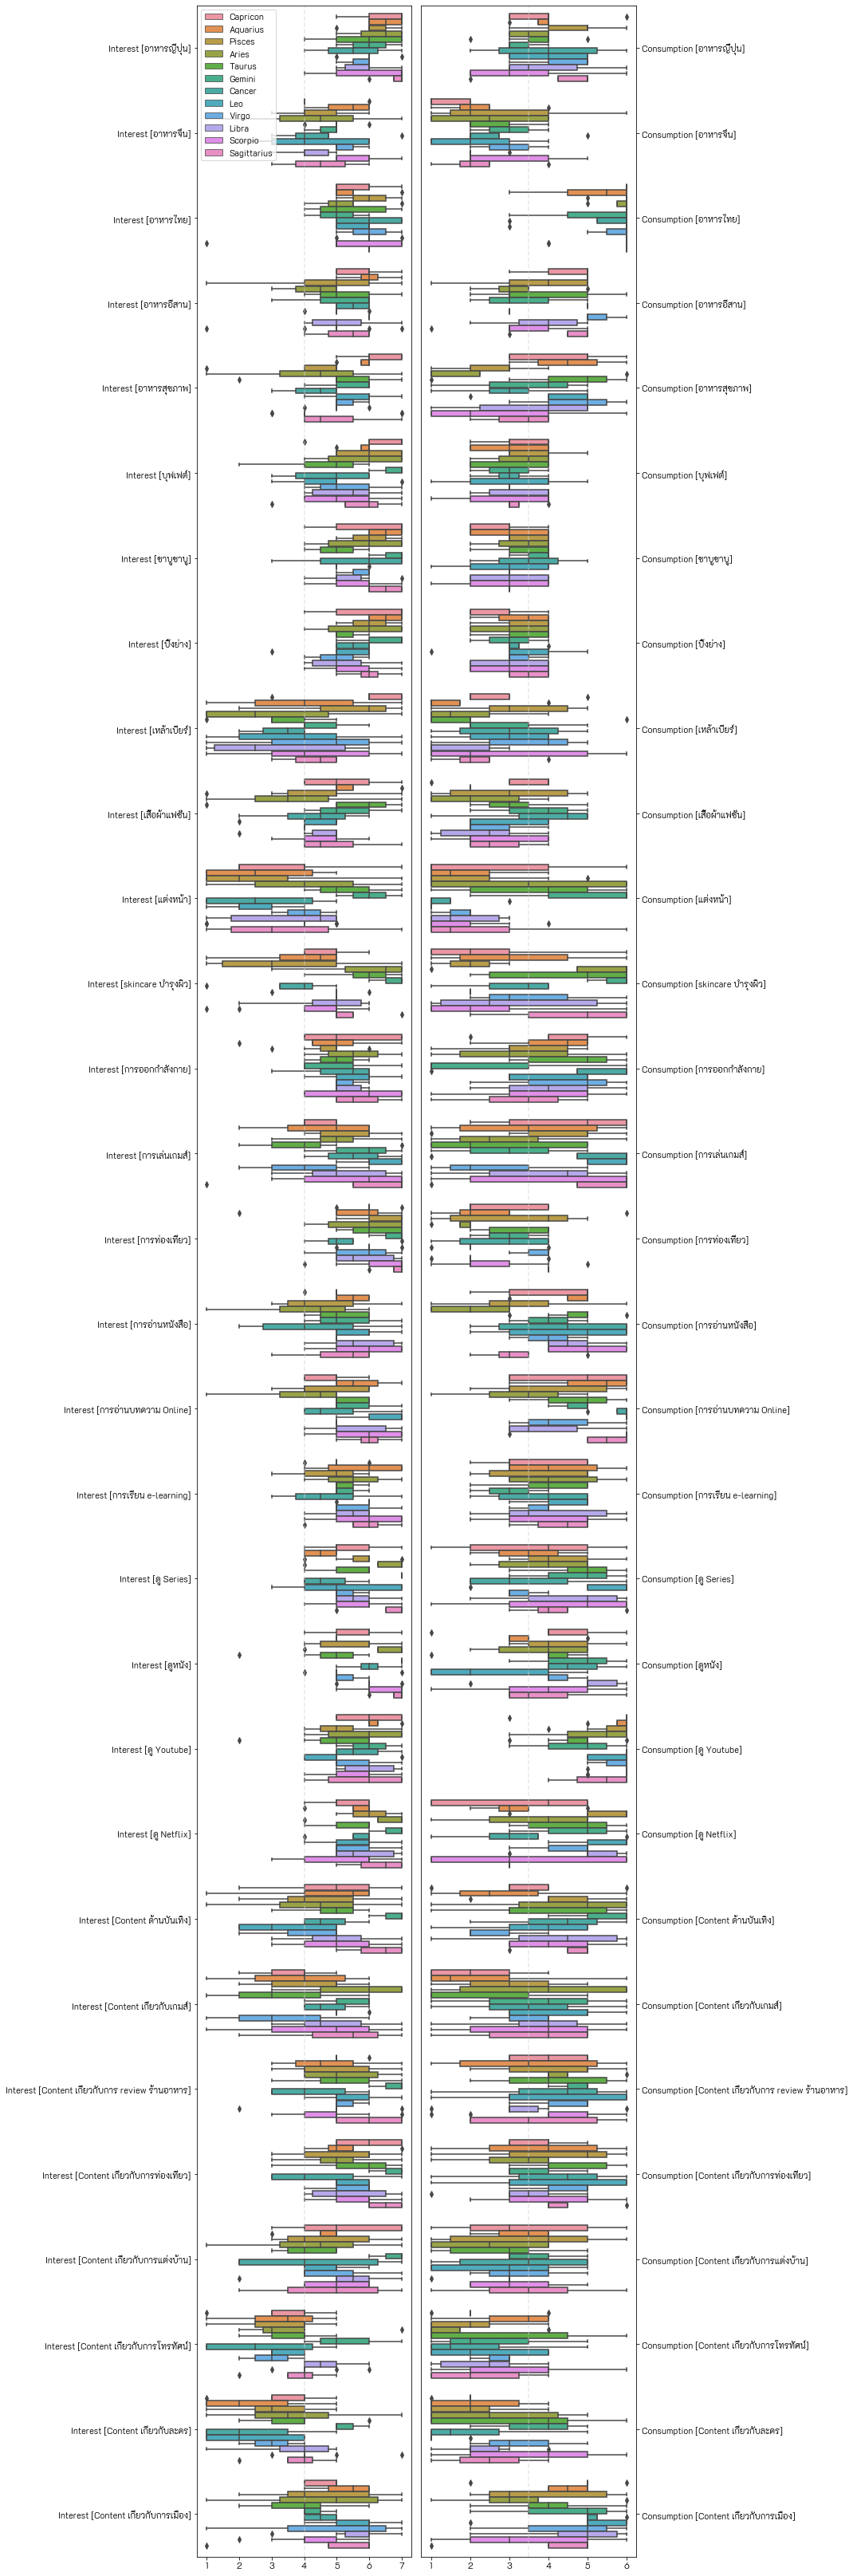

In [9]:
plt.subplots(1, 2, figsize = (15, 45), tight_layout = True)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Score', y = 'Survey', hue = 'Zodiac', data = df_unpivoted[df_unpivoted['Survey'].isin(intr_col)])
plt.gca().axes.axvline(x = 4, color = 'lightgray', alpha = 0.5, linestyle = '--')
plt.legend(loc = 'upper left')
plt.gca().axes.set_xlabel('')
plt.gca().axes.set_ylabel('')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'Score', y = 'Survey', hue = 'Zodiac', data = df_unpivoted[df_unpivoted['Survey'].isin(cons_col)])
plt.gca().axes.axvline(x = 3.5, color = 'lightgray', alpha = 0.5, linestyle = '--')
plt.gca().axes.get_legend().remove()
plt.gca().axes.yaxis.tick_right()
plt.gca().axes.set_xlabel('')
plt.gca().axes.set_ylabel('')

plt.show()